# Importer les bibliothèques et le jeu de données.

In [1]:
from sklearn.preprocessing import LabelBinarizer
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
# from sklearnex import patch_sklearn
import seaborn as sns
import pandas as pd
import missingno as msno
import numpy as np 
import matplotlib.pyplot as plt


In [102]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
# new_df est le tableau que je vais utiliser pour stocker les valeurs binarisées.
new_df = pd.DataFrame([])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### l'affichage des valeurs uniques pour chaque colonne.

In [103]:
for column in df.columns:
    print(column,":")
    print(df[column].unique())

id :
[ 9046 51676 31112 ... 19723 37544 44679]
gender :
['Male' 'Female']
age :
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.48e+0

## Visualisation et Preparation des donnees 

Il y a des valeurs manquantes dans la colonne BMI.

<Axes: >

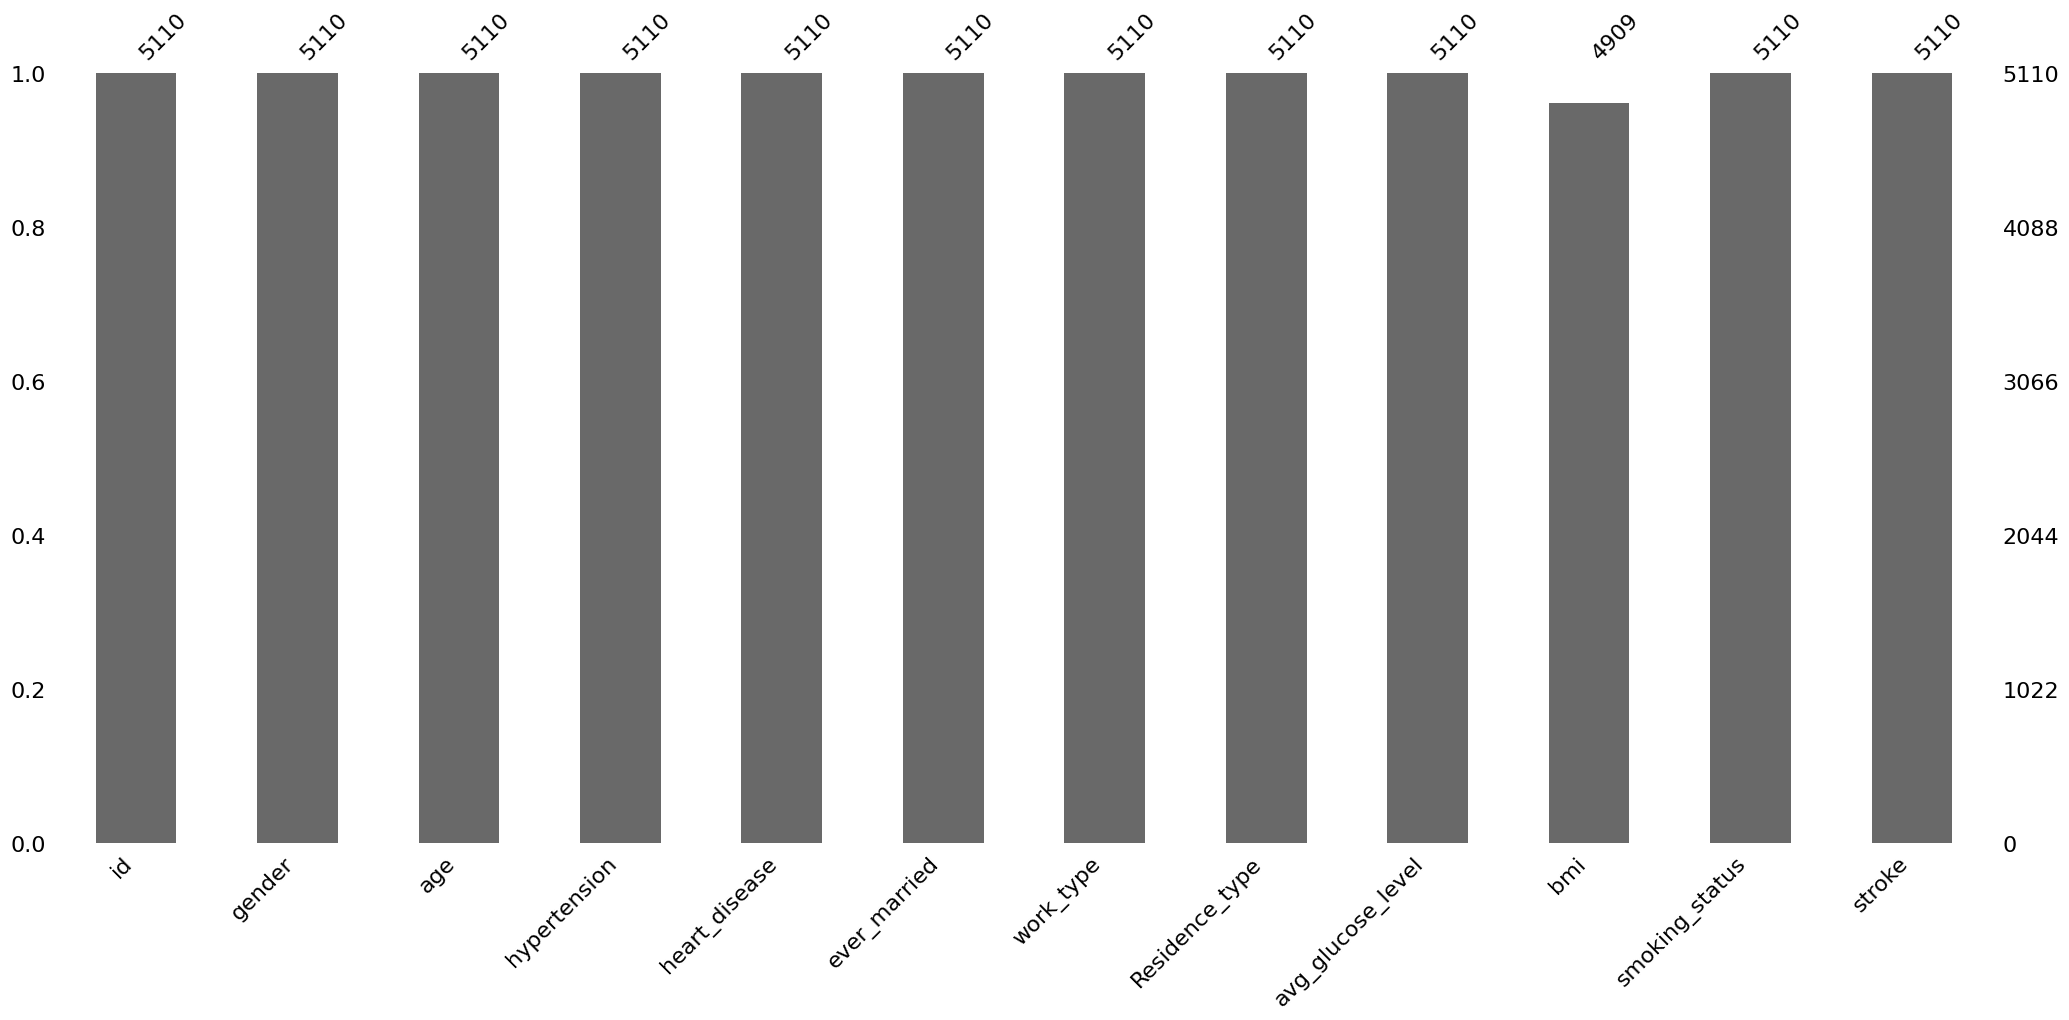

In [104]:
msno.bar(df)


# Gender

In [105]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [63]:
df[df['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


### Binarisation

In [64]:
male = []
female = []
for val in df['gender']:
    if val == 'Male':
        male.append(1)
        female.append(0)
    else:
        male.append(0)
        female.append(1)
new_df['male'] = male
new_df['female'] = female

new_df.head()

,male,female
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


# Age

(array([434., 362., 440., 484., 597., 583., 686., 559., 407., 558.]),
 array([8.0000e-02, 8.2720e+00, 1.6464e+01, 2.4656e+01, 3.2848e+01,
        4.1040e+01, 4.9232e+01, 5.7424e+01, 6.5616e+01, 7.3808e+01,
        8.2000e+01]),
 <BarContainer object of 10 artists>)

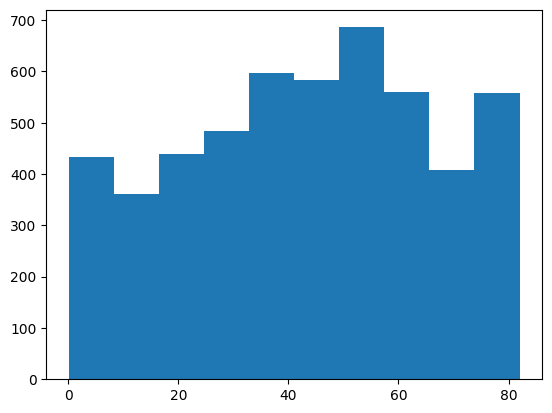

In [66]:
# df_filter = df[df['stroke'] == 1]
plt.hist(df['age'])

(array([  1.,   1.,   0.,   1.,   5.,  12.,  33.,  40.,  45., 111.]),
 array([ 1.32 ,  9.388, 17.456, 25.524, 33.592, 41.66 , 49.728, 57.796,
        65.864, 73.932, 82.   ]),
 <BarContainer object of 10 artists>)

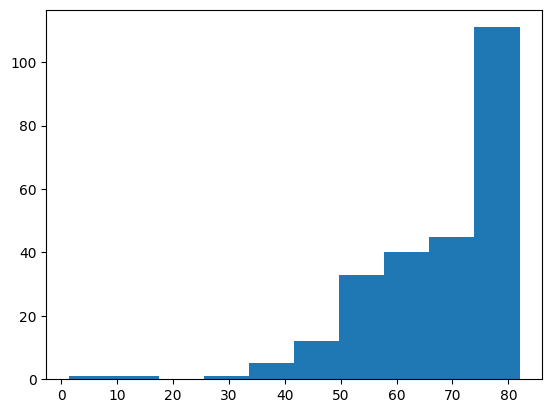

In [67]:
df_filter = df[df['stroke'] == 1]
plt.hist(df_filter['age'])

### Diviser la colonne d'âge en 4 groupes.

In [68]:
ageArr = []
for index in df.index:
    # try:
        if df['age'][index] < 30 : ageArr.append('age_0_30')
        elif df['age'][index] < 50 : ageArr.append('age_30_50')
        elif df['age'][index] < 65 : ageArr.append('age_50_65')
        else :ageArr.append( 'age_65_100' )
    # except:None
df_age_grp = pd.DataFrame(ageArr)
df_age_grp

,0
0,age_65_100
1,age_50_65
2,age_65_100
3,age_30_50
4,age_65_100
...,...
5105,age_65_100
5106,age_65_100
5107,age_30_50
5108,age_50_65


### Binarisation de l'age 

In [71]:
lb = LabelBinarizer()
age_labels = lb.fit_transform(df_age_grp[0])
age_type = pd.DataFrame(age_labels,columns=lb.classes_)
age_type
new_df = pd.concat([new_df,age_type],axis=1)
new_df


,male,female,age_0_30,age_30_50,age_50_65,age_65_100
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,1,0,0,0,0,1
3,0,1,0,1,0,0
4,0,1,0,0,0,1
...,...,...,...,...,...,...
5105,0,1,0,0,0,1
5106,0,1,0,0,0,1
5107,0,1,0,1,0,0
5108,1,0,0,0,1,0


# Ever Merried 

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

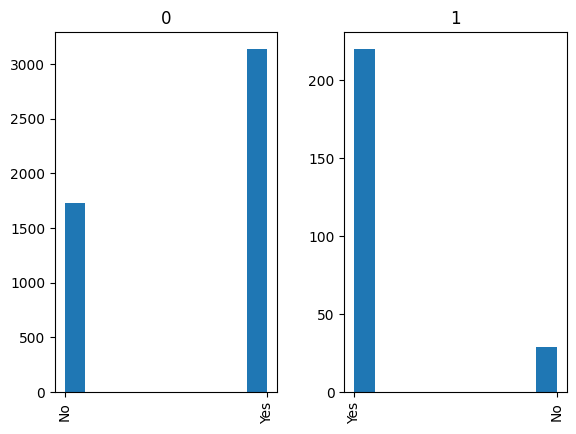

In [72]:
df.hist(column='ever_married',by='stroke')

In [73]:
new_df['married'] = df['ever_married'].replace(['Yes','No'],[1,0])
new_df.head()

,male,female,age_0_30,age_30_50,age_50_65,age_65_100,married
0,1,0,0,0,0,1,1
1,0,1,0,0,1,0,1
2,1,0,0,0,0,1,1
3,0,1,0,1,0,0,1
4,0,1,0,0,0,1,1


# Work Type

In [74]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

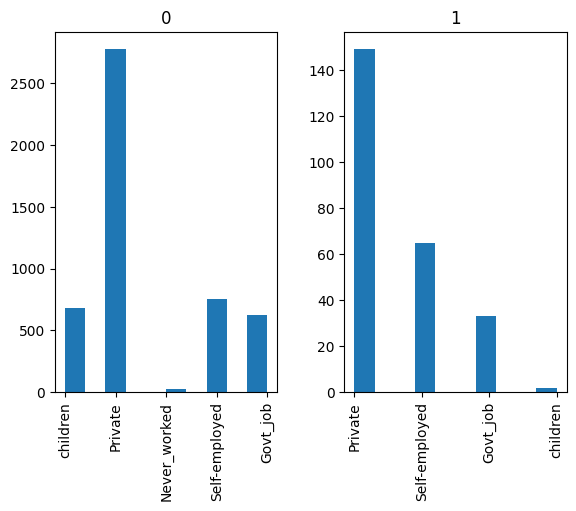

In [75]:
df.hist(column='work_type',by="stroke")

### Binarisation 

In [76]:
lb = LabelBinarizer()
work_type_labels = lb.fit_transform(df['work_type'])
df_work_type = pd.DataFrame(work_type_labels,columns=lb.classes_)
df_work_type.columns = ['Govt_job','Never_worked','Private_job','Self-employed','Children']
df_work_type

new_df = pd.concat([new_df,df_work_type],axis=1)
new_df


,male,female,age_0_30,age_30_50,age_50_65,age_65_100,married,Govt_job,Never_worked,Private_job,Self-employed,Children
0,1,0,0,0,0,1,1,0,0,1,0,0
1,0,1,0,0,1,0,1,0,0,0,1,0
2,1,0,0,0,0,1,1,0,0,1,0,0
3,0,1,0,1,0,0,1,0,0,1,0,0
4,0,1,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1,0,0,0,1,1,0,0,1,0,0
5106,0,1,0,0,0,1,1,0,0,0,1,0
5107,0,1,0,1,0,0,1,0,0,0,1,0
5108,1,0,0,0,1,0,1,0,0,1,0,0


# Residence_type

['Urban' 'Rural']


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

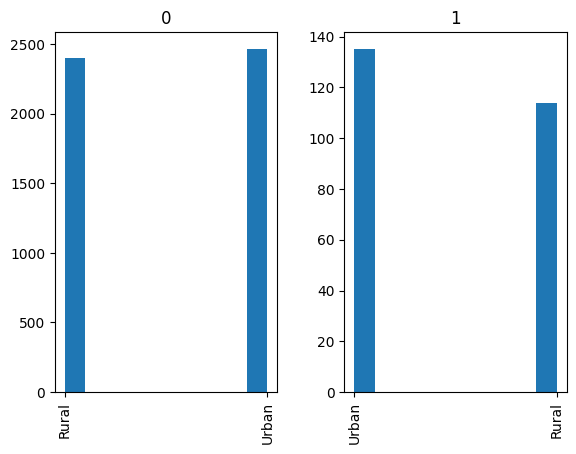

In [78]:
# Residence_type
print(df['Residence_type'].unique())

df.hist(column='Residence_type',by='stroke')

In [79]:

rural = []
urban = []
for i in df.index:
    if df['Residence_type'][i] == 'Rural':
        rural.append(1)
        urban.append(0)
    else:
        rural.append(0)
        urban.append(1)
df = df.drop(columns=['Residence_type'],axis=1)
new_df['Residence_Rural'] = rural
new_df['Residence_Urban'] = urban

new_df

,male,female,age_0_30,age_30_50,age_50_65,age_65_100,married,Govt_job,Never_worked,Private_job,Self-employed,Children,Residence_Rural,Residence_Urban
0,1,0,0,0,0,1,1,0,0,1,0,0,0,1
1,0,1,0,0,1,0,1,0,0,0,1,0,1,0
2,1,0,0,0,0,1,1,0,0,1,0,0,1,0
3,0,1,0,1,0,0,1,0,0,1,0,0,0,1
4,0,1,0,0,0,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1,0,0,0,1,1,0,0,1,0,0,0,1
5106,0,1,0,0,0,1,1,0,0,0,1,0,0,1
5107,0,1,0,1,0,0,1,0,0,0,1,0,1,0
5108,1,0,0,0,1,0,1,0,0,1,0,0,1,0


# hypertension  and heart_disease

In [80]:
df['heart_disease'].unique()

array([1, 0], dtype=int64)

In [81]:
new_df['hypertension'] = df['hypertension']


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

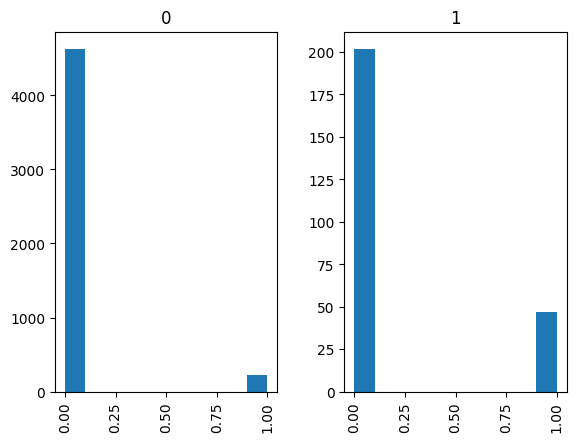

In [82]:
# df.hist(column='hypertension',by='stroke')
df.hist(column='heart_disease',by='stroke')


In [83]:
new_df['heart_disease'] = df['heart_disease']

# avg_glucose_level 

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

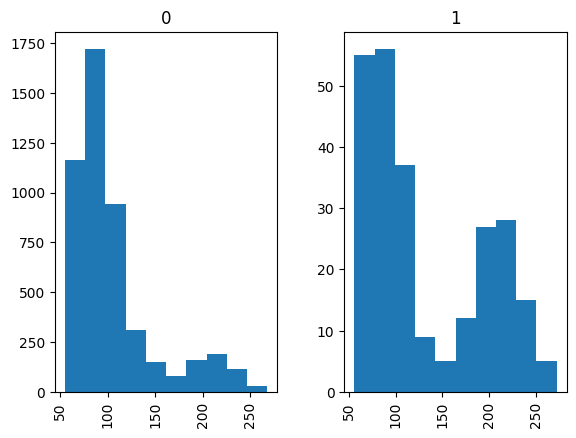

In [84]:
df.hist(column='avg_glucose_level',by='stroke')

In [85]:
print(min(df['avg_glucose_level']),max(df['avg_glucose_level']))

55.12 271.74


In [86]:
df_avg_glucose_level = pd.DataFrame()

bins = [50, 100, 150, 200, 250, 300]
group_names = ['Low', 'Normal', 'High', 'Very High', 'Extremely High']
df_avg_glucose_level['avg_glucose_level'] = df['avg_glucose_level']
df_avg_glucose_level['glucose_groups'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=group_names)
avg_glucose_labels = lb.fit_transform(df_avg_glucose_level['glucose_groups'])
df_avg_glucose_level = pd.DataFrame(avg_glucose_labels,columns=['Clucose_Extremely High','Clucose_High' ,'Clucose_Low','Clucose_Normal','Clucose_Very High'])
df_avg_glucose_level.head()




new_df = pd.concat([new_df,df_avg_glucose_level],axis=1)
new_df

,male,female,age_0_30,age_30_50,age_50_65,age_65_100,married,Govt_job,Never_worked,Private_job,...,Children,Residence_Rural,Residence_Urban,hypertension,heart_disease,Clucose_Extremely High,Clucose_High,Clucose_Low,Clucose_Normal,Clucose_Very High
0,1,0,0,0,0,1,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
1,0,1,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,0,1,0,0,0,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1,0,0,0,1,1,0,0,1,...,0,0,1,1,0,0,0,1,0,0
5106,0,1,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5107,0,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5108,1,0,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0


# smoking_status 

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

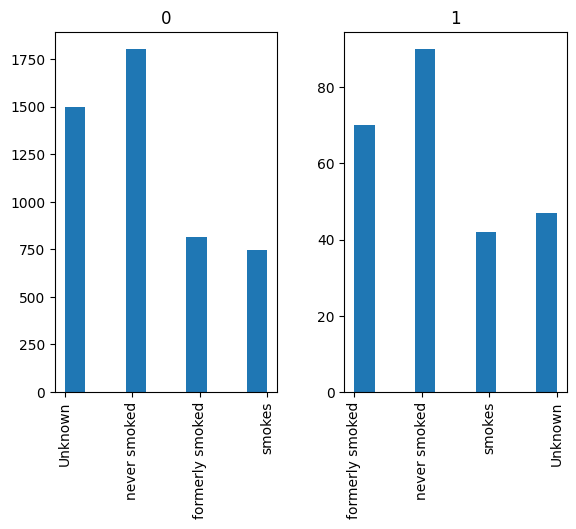

In [88]:
df.hist(column='smoking_status',by='stroke')

In [89]:
lb = LabelBinarizer()
smokin_labels = lb.fit_transform(df['smoking_status'])
df_smokin = pd.DataFrame(smokin_labels,columns=lb.classes_)
df_smokin.columns = ['Smoker_unknown','Formerly_smoked','Never_Smoked','Smokes']
df_smokin

new_df = pd.concat([new_df,df_smokin],axis=1)
new_df.head()


,male,female,age_0_30,age_30_50,age_50_65,age_65_100,married,Govt_job,Never_worked,Private_job,...,heart_disease,Clucose_Extremely High,Clucose_High,Clucose_Low,Clucose_Normal,Clucose_Very High,Smoker_unknown,Formerly_smoked,Never_Smoked,Smokes
0,1,0,0,0,0,1,1,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,1,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
3,0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0,1,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


# BMI

### Remplacement des valeurs nulles par la moyenne.

In [90]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

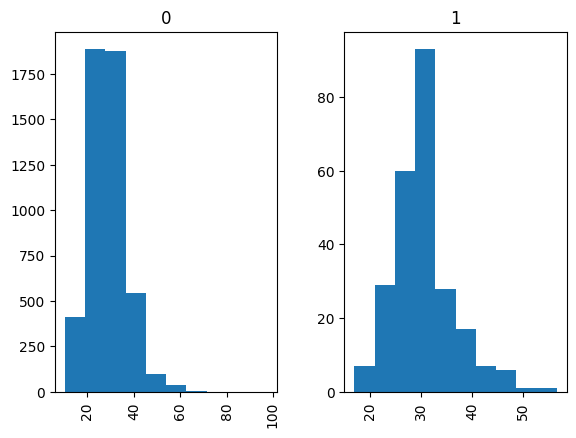

In [91]:
df.hist(column='bmi',by='stroke')

### Diviser en  4 groupe .

In [92]:

for index in range(len(df)):
        if df['bmi'][index] < 18.5: df['bmi'][index] = 'BMI_Underweight'
        elif df['bmi'][index] <25 and df['bmi'][index]>= 18.5: df['bmi'][index] = 'BMI_Normal'
        elif df['bmi'][index] < 30 and df['bmi'][index] >= 25 : df['bmi'][index]='BMI_Overweight'
        else  : df['bmi'][index] = 'BMI_Obese'
df['bmi'].unique()

C:\Users\ayoub\AppData\Local\Temp\ipykernel_3532\1552695845.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else  : df['bmi'][index] = 'BMI_Obese'


array(['BMI_Obese', 'BMI_Overweight', 'BMI_Normal', 'BMI_Underweight'],
      dtype=object)

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

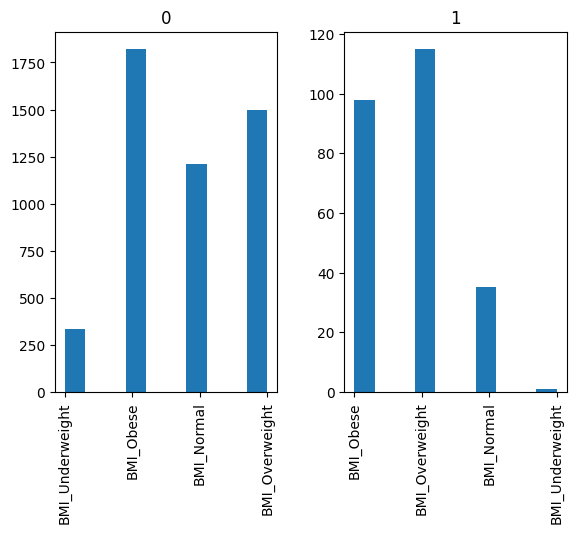

In [93]:
df.hist(column='bmi',by='stroke')

In [94]:
lb = LabelBinarizer()

bmi_labels = lb.fit_transform(df['bmi'])
df_bmi = pd.DataFrame(bmi_labels,columns=lb.classes_)
df_bmi


new_df = pd.concat([new_df,df_bmi],axis=1)
new_df.head()


,male,female,age_0_30,age_30_50,age_50_65,age_65_100,married,Govt_job,Never_worked,Private_job,...,Clucose_Normal,Clucose_Very High,Smoker_unknown,Formerly_smoked,Never_Smoked,Smokes,BMI_Normal,BMI_Obese,BMI_Overweight,BMI_Underweight
0,1,0,0,0,0,1,1,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,0,1,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
3,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


# Stroke

### Ajouter stroke a  new_df

In [96]:
new_df['stroke'] = df['stroke']

### Remplacer les 0 et les 1  sur new_df par True et False 

In [97]:
df = new_df
df = df.replace([0,1],[False,True])
df.head(10)

,male,female,age_0_30,age_30_50,age_50_65,age_65_100,married,Govt_job,Never_worked,Private_job,...,Clucose_Very High,Smoker_unknown,Formerly_smoked,Never_Smoked,Smokes,BMI_Normal,BMI_Obese,BMI_Overweight,BMI_Underweight,stroke
0,True,False,False,False,False,True,True,False,False,True,...,True,False,True,False,False,False,True,False,False,True
1,False,True,False,False,True,False,True,False,False,False,...,True,False,False,True,False,False,False,True,False,True
2,True,False,False,False,False,True,True,False,False,True,...,False,False,False,True,False,False,True,False,False,True
3,False,True,False,True,False,False,True,False,False,True,...,False,False,False,False,True,False,True,False,False,True
4,False,True,False,False,False,True,True,False,False,False,...,False,False,False,True,False,True,False,False,False,True
5,True,False,False,False,False,True,True,False,False,True,...,False,False,True,False,False,False,False,True,False,True
6,True,False,False,False,False,True,True,False,False,True,...,False,False,False,True,False,False,False,True,False,True
7,False,True,False,False,False,True,False,False,False,True,...,False,False,False,True,False,True,False,False,False,True
8,False,True,False,False,True,False,True,False,False,True,...,False,True,False,False,False,False,False,True,False,True
9,False,True,False,False,False,True,True,False,False,True,...,False,True,False,False,False,True,False,False,False,True


In [98]:

df = df[df['stroke'] == 1]
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
rules 

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(male),(age_65_100),0.433735,0.638554,0.265060,0.611111,0.957023,-0.011903,0.929432,-0.073477
1,(male),(married),0.433735,0.883534,0.401606,0.925926,1.047980,0.018387,1.572289,0.080851
2,(male),(Private_job),0.433735,0.598394,0.293173,0.675926,1.129567,0.033628,1.239243,0.202565
3,(male),(Residence_Urban),0.433735,0.542169,0.232932,0.537037,0.990535,-0.002226,0.988916,-0.016595
4,(male),(BMI_Overweight),0.433735,0.461847,0.216867,0.500000,1.082609,0.016548,1.076305,0.134752
...,...,...,...,...,...,...,...,...,...,...
478,"(Residence_Urban, married, stroke)",(BMI_Overweight),0.457831,0.461847,0.228916,0.500000,1.082609,0.017467,1.076305,0.140741
479,"(married, BMI_Overweight, stroke)",(Residence_Urban),0.413655,0.542169,0.228916,0.553398,1.020712,0.004645,1.025144,0.034607
480,"(Residence_Urban, BMI_Overweight)","(married, stroke)",0.269076,0.883534,0.228916,0.850746,0.962890,-0.008822,0.780321,-0.050087
481,"(Residence_Urban, married)","(BMI_Overweight, stroke)",0.457831,0.461847,0.228916,0.500000,1.082609,0.017467,1.076305,0.140741


In [99]:
rules_stroke = rules[rules['consequents']=={'stroke'}]
rules_stroke

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(male),(stroke),0.433735,1.0,0.433735,1.0,1.0,0.0,inf,0.0
21,(female),(stroke),0.566265,1.0,0.566265,1.0,1.0,0.0,inf,0.0
23,(age_50_65),(stroke),0.281124,1.0,0.281124,1.0,1.0,0.0,inf,0.0
38,(age_65_100),(stroke),0.638554,1.0,0.638554,1.0,1.0,0.0,inf,0.0
51,(married),(stroke),0.883534,1.0,0.883534,1.0,1.0,0.0,inf,0.0
...,...,...,...,...,...,...,...,...,...,...
447,"(Residence_Urban, Private_job, married)",(stroke),0.289157,1.0,0.289157,1.0,1.0,0.0,inf,0.0
455,"(married, Private_job, Clucose_Low)",(stroke),0.224900,1.0,0.224900,1.0,1.0,0.0,inf,0.0
463,"(Private_job, BMI_Obese, married)",(stroke),0.232932,1.0,0.232932,1.0,1.0,0.0,inf,0.0
470,"(Private_job, BMI_Overweight, married)",(stroke),0.236948,1.0,0.236948,1.0,1.0,0.0,inf,0.0


In [100]:
rules_stroke.to_csv('resulte.csv',index=False)